<a href="https://colab.research.google.com/github/Iprass30/Latihan/blob/main/Rohman_Prasetyo_Wibowo_EDA_%26_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://drive.google.com/uc?id=1-CkViCEe_aRWGzvLqCu15w3VMXbDQfsF
)


# Pendahuluan

### Import Library

In [7]:
import pandas as pd                           
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Mengakses dataset

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/Iprass30/Kelas-Mahir-Pejuang-Data-2.0/main/titanic_modify.csv', sep=';')
df.head() 

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712.833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


### Memahami dataset

Dataset Titanic dibuat untuk membuat machine learning untuk melakukan klasifikasi biner(Selamat atau Tidak Selamat. Variabel-variabel yang terdapat pada dataset ini adalah sebagai berikut:
1. **PassengerId** = Nomor Id Penumpang 
2. **Survived** = Keterangan Selamat(0=Tidak, 1=Ya)
3. **Pclass** = Kelas Tiket (1=Kelas 1, 2=Kelas 2, dst)
4. **Name** = Nama Penumpang
5. **Sex** = Jenis kelamin
6. **Age** = Usia dalam tahun
7. **SibSp** = Jumlah saudara kandung / pasangan di kapal Titanic
8. **Parch** = Jumlah orang tua / anak di kapal Titanic
9. **Ticket** = Nomor Tiket
10. **Fare** = Harga Tiket
11. **Cabin** = Nama Kabin
12. **Embarked** = Pelabuhan Asal (C = Cherbourg, Q = Queenstown, S = Southampton)

#**Eksploratory Data Analysis**

### Dimensi Data

In [9]:
df.shape #Disini dapat kita tampilkan ukuran dari data frame tersebut

(707, 13)

Artinya kita memiliki data dengan 12 kolom dan 891 baris

### Variabel Pada Dataset

In [10]:
df.columns.values #Disini dapat kita lihat feature yang ada pada data frame

array(['Unnamed: 0', 'PassengerId', ' Survived ', 'Pclass ', 'Name',
       'Sex', 'Age', 'SibSp', 'Parch ', 'Ticket', 'Fare ', 'cabin',
       'Embarked'], dtype=object)

In [11]:
df.dtypes #kita dapat melihat tipe data dari setiap feture dari data

Unnamed: 0       int64
PassengerId      int64
 Survived        int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare            object
cabin           object
Embarked        object
dtype: object

In [12]:
df.info() #Dapat kita lihat info feture dari data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   707 non-null    int64  
 1   PassengerId  707 non-null    int64  
 2    Survived    707 non-null    int64  
 3   Pclass       707 non-null    int64  
 4   Name         707 non-null    object 
 5   Sex          707 non-null    object 
 6   Age          562 non-null    float64
 7   SibSp        707 non-null    int64  
 8   Parch        707 non-null    int64  
 9   Ticket       707 non-null    object 
 10  Fare         707 non-null    object 
 11  cabin        159 non-null    object 
 12  Embarked     706 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 71.9+ KB


Kita dapat mengetahui tipe-tipe data masing-masing variabel dan nama-nama variabel dalam dataset

### Mengecek Missing Data

In [13]:
df.isnull().sum() #untuk menghitung jumlah null dalam feature

Unnamed: 0       0
PassengerId      0
 Survived        0
Pclass           0
Name             0
Sex              0
Age            145
SibSp            0
Parch            0
Ticket           0
Fare             0
cabin          548
Embarked         1
dtype: int64

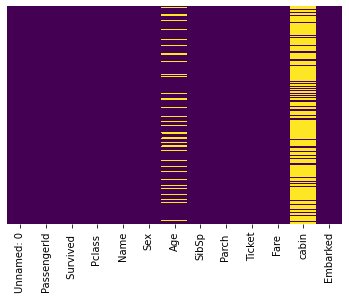

In [14]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis') #dengan ini kita dapat melihat plot data nul beserta sebarannya

Kolom-kolom dengan data kosong adalah: Age, Cabin, Embarked

### Mengecek Outlier

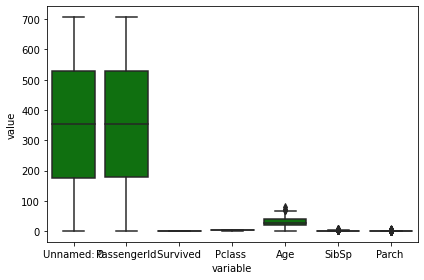

In [15]:
df1=df.select_dtypes(include=['float64', 'int64'])#Memilih kolom numerik

sns.boxplot(x="variable", y="value", color='green',orient='v', data=pd.melt(df1))#untuk menampilkan outlayer melalui boxplot untuk menghasilkan visualisasi gambar
plt.tight_layout()


Kolom numeric yang memiliki outlier adalah Age, Sibsp, Parch, dan Fare

### Melihat Korelasi Data

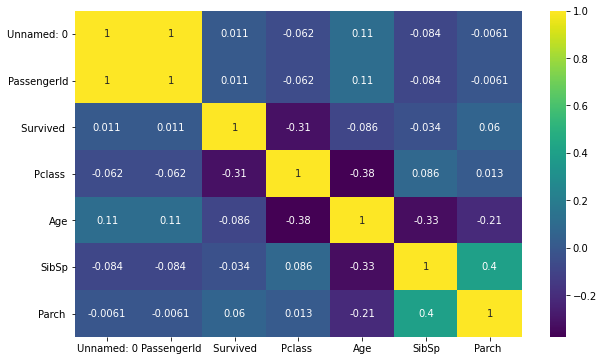

In [16]:
k = len(df1.columns)
cm = df1.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis') #dapat kita lihat data yang ada beserta korelasinya

### Melihat Statistik Data

In [17]:
df.describe()#Dapat kita deskripsikan feature dalam data frame

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch
count,707.000000,707.000000,707.000000,707.000000,562.000000,707.000000,707.000000
mean,353.000000,354.000000,0.387553,2.308345,30.034253,0.530410,0.383310
std,204.237607,204.237607,0.487537,0.835458,14.626759,1.067214,0.815157
min,0.000000,1.000000,0.000000,1.000000,0.750000,0.000000,0.000000
25%,176.500000,177.500000,0.000000,2.000000,21.000000,0.000000,0.000000
50%,353.000000,354.000000,0.000000,3.000000,28.000000,0.000000,0.000000
75%,529.500000,530.500000,1.000000,3.000000,39.000000,1.000000,0.000000
max,706.000000,707.000000,1.000000,3.000000,80.000000,8.000000,6.000000


### Plot Distribusi Data Numerik

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

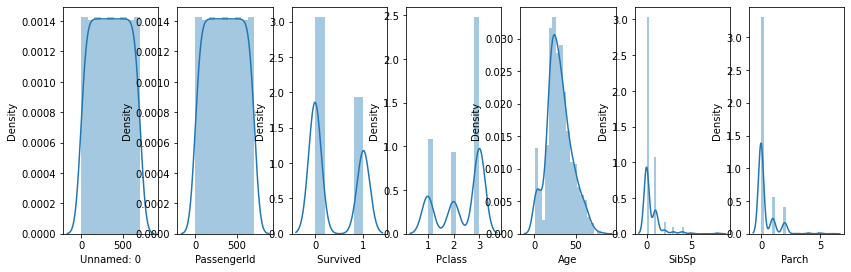

In [18]:
l = df1.columns.values
number_of_columns=len(df1.columns)
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True)

Plot ini untuk melihat apakah variabel-variabel pada dataset berdistribusi normal. Variabel-variabel Age, SibSp, Parch, dan Fare cenderung memiliki skewnes positif. Itu berarti berarti ekor distribusi berada di sebelah kanan nilai terbanyak.

Apa itu Skewnes dan Kurtosis?
https://thomassoseco.blogspot.com/2019/02/skewness-dan-kurtosis.html

### Pairplot

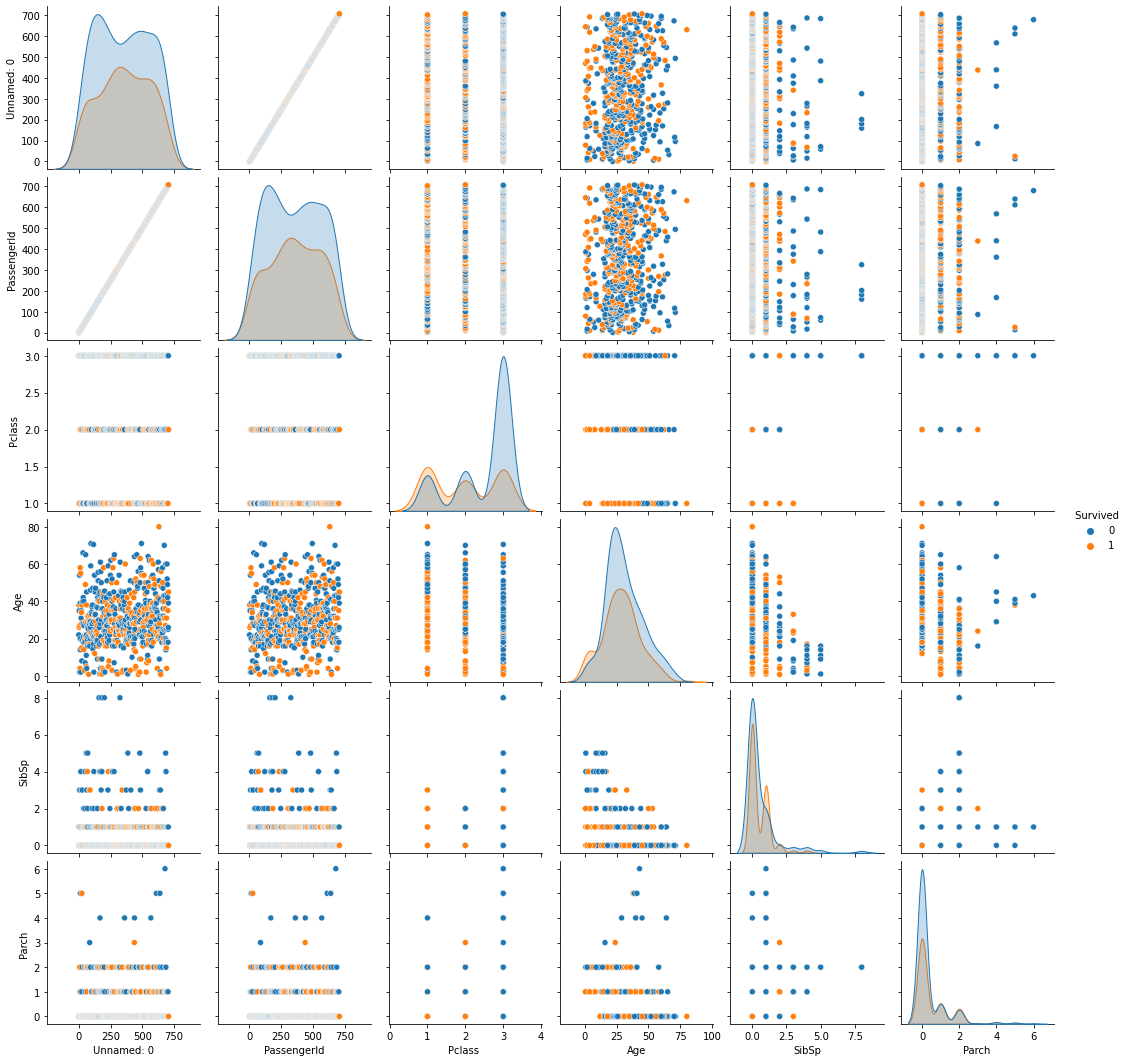

In [19]:
g = sns.pairplot(df1, hue=' Survived ')

Plot ini untuk mengetahui plot untuk masing-masing pasangan data numerik

#**Data Preprocessing**

Data preprocessing ini digunakan guna menyiapkan data untuk diklasifikasi menggunakan metode SVM(Hanya Contoh).

Setelah mengetahui hasil EDA di atas maka untuk hasil yang baik diperlukan beberapa hal sebagai berikut:
1. Menghapus kolom teks yang tidak diperlukan: **Name** dan **Ticket**
2. Mengisi NaN pada kolom **Cabin** dengan salah satu nama kabin tertentu*, mengisi NaN pada kolom **Age **dengan nilai rata-ratanya
3. Melakukan pengkodean(Encoding) pada kolom **Sex** , **Cabin**, dan **Embarked**
4. Menghapus outlier
5. Karena nilai data ada yang sangat besar dan kecil maka perlu dilakukan normalisasi

Setelah data diperbaiki dilakukan langkah sebagai berikut:
1. Memilih variabel independent dan label
2. Membagi data menjadi data training dan data testing


[Note] * Ini hanya contoh untuk melakukan pengisian data NaN(Kosong), nama kabin mungkin menjadi penting sehingga tidak segampang itu diganti

### Seleksi Kolom

In [20]:
df=df.drop(columns=['Name', 'Ticket'])
df.head() #Dengan ini kita dapat membuang kolom name dan Ticket

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,cabin,Embarked
0,0,1,0,3,male,22.0,1,0,7.25,NaN,S
1,1,2,1,1,female,38.0,1,0,712.833,C85,C
2,2,3,1,3,female,26.0,0,0,7.925,NaN,S
3,3,4,1,1,female,35.0,1,0,53.1,C123,S
4,4,5,0,3,male,35.0,0,0,8.05,NaN,S


### Mengisis NaN

In [21]:
df['cabin'].value_counts()

G6             4
C23 C25 C27    4
F2             3
F33            3
C22 C26        3
              ..
C86            1
C103           1
C54            1
C111           1
B73            1
Name: cabin, Length: 121, dtype: int64

In [22]:
df['cabin'] = df['cabin'].replace(np.nan, "E49") #Dapat kita replace nilai Nan dengan E49
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,cabin,Embarked
0,0,1,0,3,male,22.0,1,0,7.25,E49,S
1,1,2,1,1,female,38.0,1,0,712.833,C85,C
2,2,3,1,3,female,26.0,0,0,7.925,E49,S
3,3,4,1,1,female,35.0,1,0,53.1,C123,S
4,4,5,0,3,male,35.0,0,0,8.05,E49,S


In [23]:
df['Age']=df['Age'].fillna(df['Age'].mean()) #dapat kita ubah nilai NA dengan median
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,cabin,Embarked
0,0,1,0,3,male,22.0,1,0,7.25,E49,S
1,1,2,1,1,female,38.0,1,0,712.833,C85,C
2,2,3,1,3,female,26.0,0,0,7.925,E49,S
3,3,4,1,1,female,35.0,1,0,53.1,C123,S
4,4,5,0,3,male,35.0,0,0,8.05,E49,S


In [24]:
df[['Age','cabin']].isnull().sum() #dapat menghitung jumlah null dalam feature Age dan cabin

Age      0
cabin    0
dtype: int64

### Melakukan Pengkodean(Encoding)

In [25]:
df['Sex'].value_counts() #Dapat kita hitung feature sex

male      453
female    254
Name: Sex, dtype: int64

In [26]:
df['Embarked'].value_counts() #Dapat kita hitung feature embarked

S    506
C    136
Q     64
Name: Embarked, dtype: int64

In [27]:
df['cabin'].value_counts() #Dapat kita hitung feature cabin

E49            548
G6               4
C23 C25 C27      4
F2               3
F33              3
              ... 
C86              1
C103             1
C54              1
C111             1
B73              1
Name: cabin, Length: 122, dtype: int64

In [28]:
#Encoding dengan data sedikit
cleanup_nums = {"Sex":     {"male": 1, "female": 2}, 
                "Embarked": {"S": 1, "C": 2, "Q": 3}} #Mengubah male, female, S , C, Q menjadi angka
df = df.replace(cleanup_nums) #untuk mengubah data di atas
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,cabin,Embarked
0,0,1,0,3,1,22.0,1,0,7.25,E49,1.0
1,1,2,1,1,2,38.0,1,0,712.833,C85,2.0
2,2,3,1,3,2,26.0,0,0,7.925,E49,1.0
3,3,4,1,1,2,35.0,1,0,53.1,C123,1.0
4,4,5,0,3,1,35.0,0,0,8.05,E49,1.0


In [29]:
df["cabin"] = df["cabin"].astype('category') #dapat kita lihat data cabin berdasarkan category
df.dtypes

Unnamed: 0        int64
PassengerId       int64
 Survived         int64
Pclass            int64
Sex               int64
Age             float64
SibSp             int64
Parch             int64
Fare             object
cabin          category
Embarked        float64
dtype: object

In [30]:
#Encoding data dengan kategori sangat banyak
df["cabin"] = df["cabin"].cat.codes
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,cabin,Embarked
0,0,1,0,3,1,22.0,1,0,7.25,108,1.0
1,1,2,1,1,2,38.0,1,0,712.833,68,2.0
2,2,3,1,3,2,26.0,0,0,7.925,108,1.0
3,3,4,1,1,2,35.0,1,0,53.1,47,1.0
4,4,5,0,3,1,35.0,0,0,8.05,108,1.0


Referensi Encoding Lengkap:
https://pbpython.com/categorical-encoding.html

### Menghapus Outlier

Rentang interkuartil (IQR) adalah ukuran penyebaran statistik dan dihitung sebagai perbedaan antara persentil ke-75 dan ke-25. Ini diwakili oleh rumus IQR = Q3 - Q1. Baris kode di bawah menghitung dan mencetak kisaran interkuartil untuk setiap variabel dalam dataset.

Teknik ini menggunakan skor IQR yang dihitung sebelumnya untuk menghilangkan pencilan. Aturan praktisnya adalah bahwa segala sesuatu yang tidak berada dalam kisaran (Q1 - 1.5 IQR) dan (Q3 + 1.5 IQR) adalah pencilan, dan dapat dihapus.

Metode ini dipakai karena untuk identifikasi outlier awal digunakan metode boxplot.

Referensi: https://www.pluralsight.com/guides/cleaning-up-data-from-outliers

In [31]:
#Menghitung Skor IQR
sorted(df)

Q1=df.quantile(0.25) #untuk mengambil data pada kuartil 1
Q3=df.quantile(0.75) #untuk mengambil data pada kuartil 3
IQR=Q3-Q1
print(IQR)

Unnamed: 0     353.0
PassengerId    353.0
 Survived        1.0
Pclass           1.0
Sex              1.0
Age             14.0
SibSp            1.0
Parch            0.0
cabin            0.0
Embarked         1.0
dtype: float64


In [40]:
#Menghapus Outlier
df_clear = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]#menghapus outlier dalam perhitungan yang telah ada
df_clear

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,cabin,Embarked
0,0,1,0,3,1,22.000000,1,0,7.25,108,1.0
2,2,3,1,3,2,26.000000,0,0,7.925,108,1.0
4,4,5,0,3,1,35.000000,0,0,8.05,108,1.0
5,5,6,0,3,1,30.034253,0,0,84.583,108,3.0
9,9,10,1,2,2,14.000000,1,0,300.708,108,2.0
...,...,...,...,...,...,...,...,...,...,...,...
697,697,698,1,3,2,30.034253,0,0,77.333,108,3.0
703,703,704,0,3,1,25.000000,0,0,77.417,108,3.0
704,704,705,0,3,1,26.000000,1,0,78.542,108,1.0
705,705,706,0,2,1,39.000000,0,0,26,108,1.0


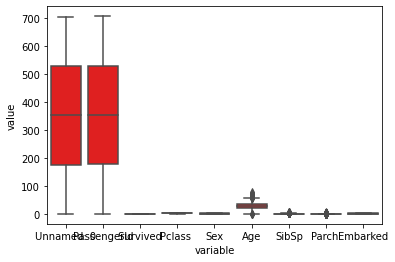

In [43]:
#Melihat Outlier
df_clear=df.select_dtypes(include=['float64', 'int64'])#Memilih kolom numerik
sns.boxplot(x="variable", y="value", color='red',orient='v', data=pd.melt(df_clear))#box data yang sudah dihapus outlier

plt.show()

Outlier berhasil dihapus

### Normalisasi Data

Karena tujuannya adalah klasifikasi menggunakan SVM maka normalisasi data wajib dilakukan.

Lihat referensi: 
https://neerajkumar.org/writings/svm/#:~:text=SVMs%20assume%20that%20the%20data,the%20SVM%20is%20very%20important.&text=Some%20libraries%20recommend%20doing%20a,dimension%20to%200%20and%201.



In [ ]:
#Normalisasi data dengan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_clear), columns=df_clear.columns)#normalisasi data dengan nilai yang ada dalam setiap feature

df_norm

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0.000000,0.000000,0.0,1.0,0.0,0.268139,0.125,0.000000,0.0
1,0.001416,0.001416,1.0,0.0,1.0,0.470032,0.125,0.000000,0.5
2,0.002833,0.002833,1.0,1.0,1.0,0.318612,0.000,0.000000,0.0
3,0.004249,0.004249,1.0,0.0,1.0,0.432177,0.125,0.000000,0.0
4,0.005666,0.005666,0.0,1.0,0.0,0.432177,0.000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
702,0.994334,0.994334,0.0,1.0,1.0,0.217666,0.000,0.166667,0.5
703,0.995751,0.995751,0.0,1.0,0.0,0.305994,0.000,0.000000,1.0
704,0.997167,0.997167,0.0,1.0,0.0,0.318612,0.125,0.000000,0.0
705,0.998584,0.998584,0.0,0.5,0.0,0.482650,0.000,0.000000,0.0


### Memilih Variable Target & Variabel Independent

In [ ]:
y=df_norm[' Survived ']
X=df_norm.drop(columns=[' Survived '])

#Mengubah data menjadi array
y=np.array(y)
X=np.array(X)

print(y)
print(X)

[0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1.

### Membagi Data Menjadi Data Training dan Data Testing

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y) #untuk split data menjadi data train dan test

## **This is the end of Notebooks**


`Say: Alhamdulillah, panjang banget dah :)`


#**Referensi:**
https://nbviewer.jupyter.org/github/PBPatil/Exploratory_Data_Analysis-Wine_Quality_Dataset/blob/master/winequality_white.ipynb